In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tifffile import imread, imwrite
from csbdeep.utils import Path, normalize
from csbdeep.utils.tf import keras_import
keras = keras_import()

from stardist import export_imagej_rois, random_label_cmap
from stardist.models import StarDist2D

np.random.seed(0)
cmap = random_label_cmap()

In [2]:
import os
from glob import glob

# CHANGE PATH

pth = r'\\10.99.68.178\andreex\data\monkey fetus\gestational 40'  # path of ndpi files
WSIs = sorted(glob(f'{pth}\*.ndpi'))

In [3]:
WSIs[:20]

['\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\monkey_fetus_40_0001.ndpi',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\monkey_fetus_40_0002.ndpi',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\monkey_fetus_40_0003.ndpi',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\monkey_fetus_40_0004.ndpi',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\monkey_fetus_40_0005.ndpi',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\monkey_fetus_40_0006.ndpi',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\monkey_fetus_40_0007.ndpi',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\monkey_fetus_40_0008.ndpi',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\monkey_fetus_40_0009.ndpi',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\monkey_fetus_40_0010.ndpi',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\monke

In [4]:
def show_image(img, crop_x, crop_y, tile_size, **kwargs):
    """Plot large image at different resolutions."""
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))

    # Plot the original image on the left
    ax[0].imshow(img, **kwargs)

    # Crop the image
    cropped_img = img[crop_y:crop_y+tile_size, crop_x:crop_x+tile_size]

    # Plot the cropped image on the right
    ax[1].imshow(cropped_img, **kwargs)

    ax[0].axis('off')
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

In [5]:
def show_image_overlay(img, labels, crop_x, crop_y, tile_size, lbl_cmap):
    """Plot large image at different resolutions."""
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))

    # Crop the image
    cropped_img = img[crop_y:crop_y+tile_size, crop_x:crop_x+tile_size]
    cropped_labels = labels[crop_y:crop_y+tile_size, crop_x:crop_x+tile_size]

    # Plot the original image on the left
    ax[0].imshow(cropped_img)

    # Plot the cropped image on the right
    ax[1].imshow(cropped_img)
    ax[1].imshow(cropped_labels, cmap=lbl_cmap, alpha=0.5)

    ax[0].axis('off')
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

In [6]:
ind = 200  # which image in directory list you are loading

# you might need to run "pip install imagecodecs" if you get jpeg compression error

img = imread(WSIs[ind])
n_channel = 1 if img[0].ndim == 2 else img[0].shape[-1]  #If no third

img = img/255

In [7]:
# fallopian tube:
fallopian_tube_pth = r'\\10.99.68.178\andre\data\Ashleigh fallopian tube\fallopian tubes\AJF232\fallopian_tubes_AJLF232_0135.ndpi'

img = imread(fallopian_tube_pth)
n_channel = 1 if img[0].ndim == 2 else img[0].shape[-1]  #If no third

img = img/255

In [8]:
import json
from stardist.models import Config2D, StarDist2D

def load_model(model_path: str) -> StarDist2D:
    # Load StarDist model weights, configurations, and thresholds
    with open(model_path + '\\config.json', 'r') as f:
        config = json.load(f)
    with open(model_path + '\\thresholds.json', 'r') as f:
        thresh = json.load(f)
    model = StarDist2D(config=Config2D(**config), basedir=model_path, name='offshoot_model')
    model.thresholds = thresh
    print('Overriding defaults:', model.thresholds, '\n')
    model.load_weights(model_path + '\\weights_best.h5')
    return model

#
# CHANGE RIGHT MODEL
model = load_model(r'\\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_400_pt_10_gaus_ratio_0')

base_model.py (149): output path for model already exists, files may be overwritten: \\10.99.68.178\andreex\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_400_pt_10_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6883699162882626, nms=0.3) 



In [9]:
labels, polys = model.predict_instances_big(img, axes='YXC', block_size=4096, min_overlap=128, context=128, n_tiles=(4,4,1))

effective: block_size=(4096, 4096, 3), min_overlap=(128, 128, 0), context=(128, 128, 0)


100%|██████████| 260/260 [08:35<00:00,  1.98s/it]


In [10]:
img.size

10202480640

In [11]:
labels.size

3400826880

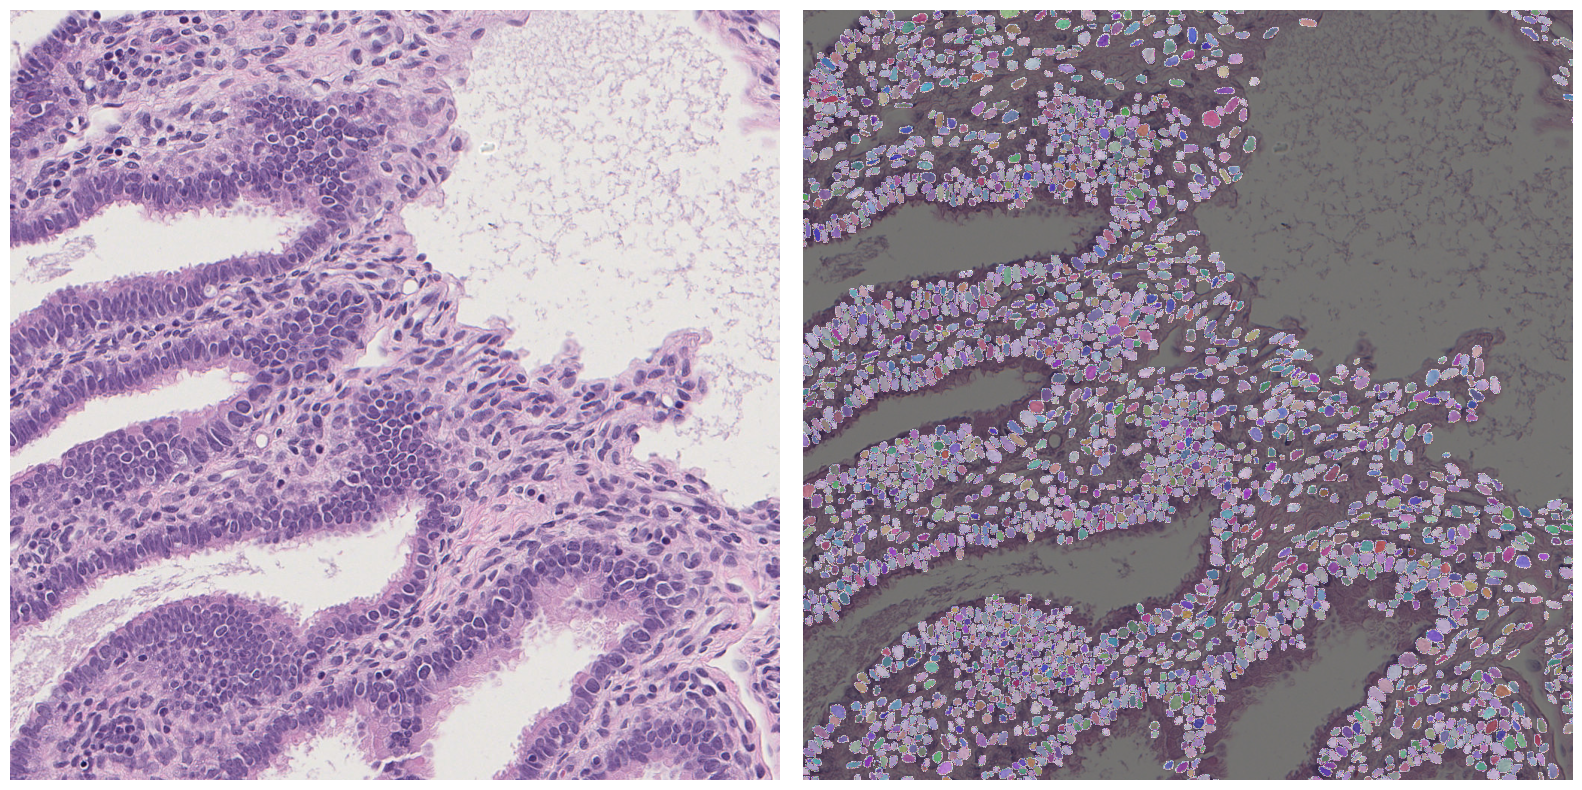

In [18]:
show_image_overlay(img, labels, crop_x=44839, crop_y=24803, tile_size=1024, lbl_cmap=cmap)
# show_image(img, crop_x=10000, crop_y=10000, tile_size=1024)

MemoryError: Unable to allocate 76.0 GiB for an array with shape (47872, 71040, 3) and data type float64

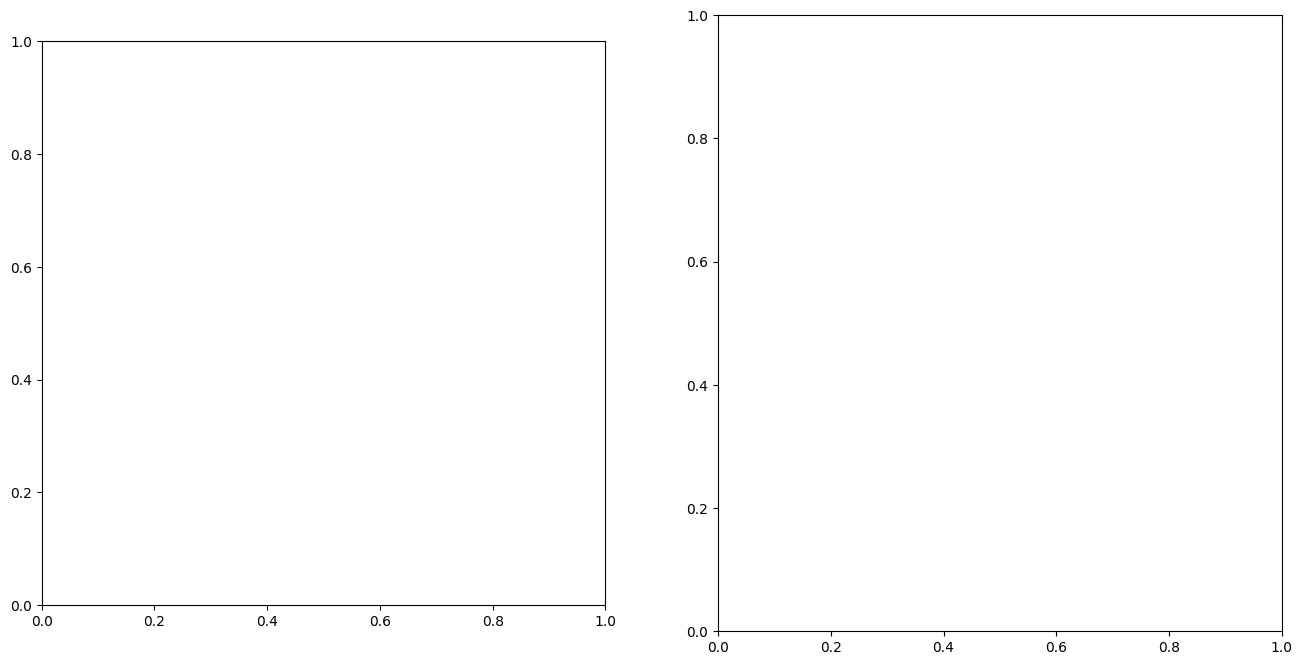

In [13]:
show_image(img, crop_x=44639, crop_y=24603, tile_size=1024)

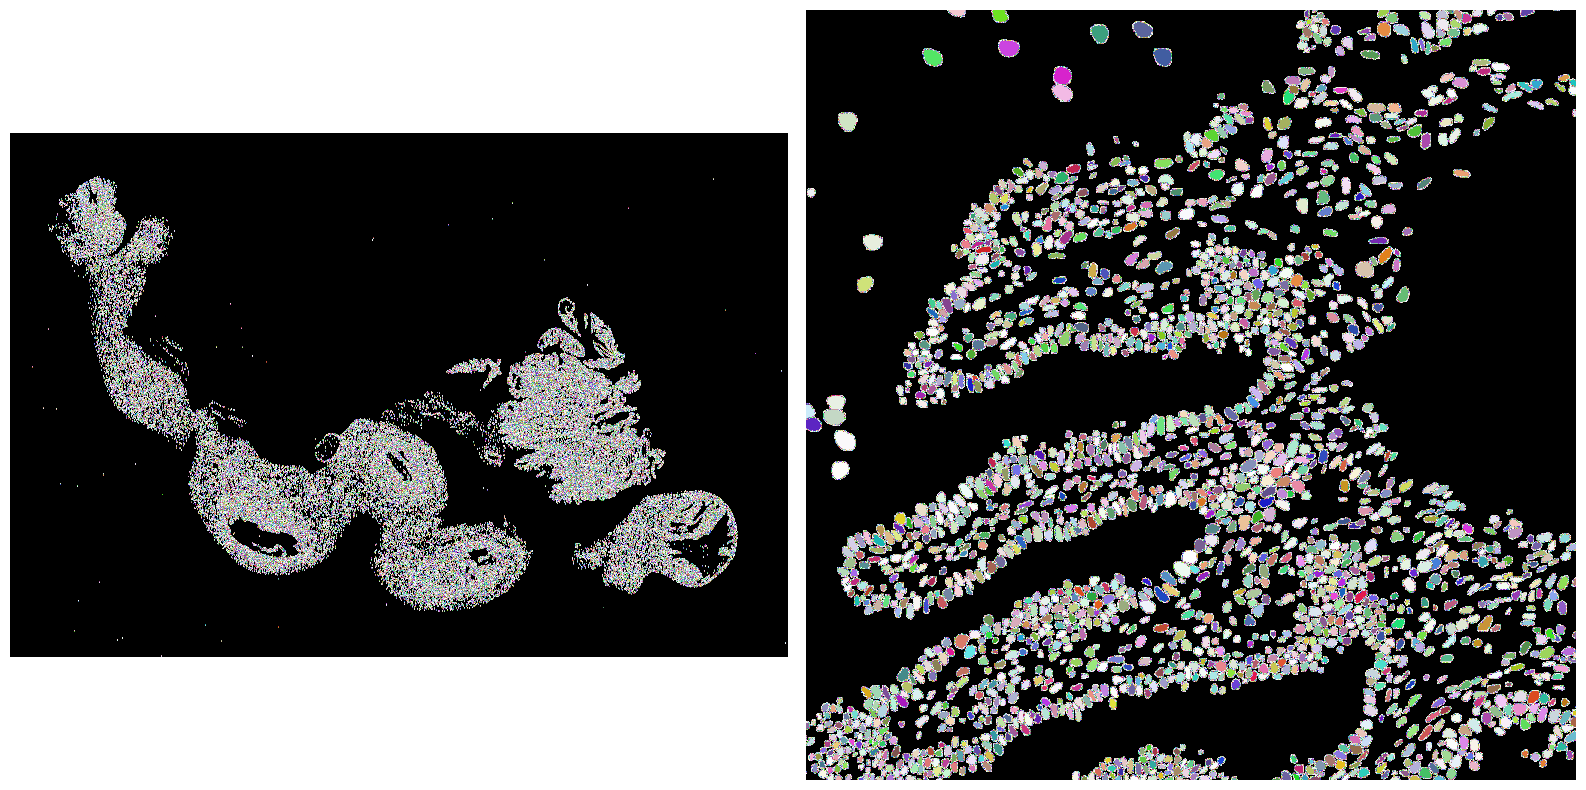

In [17]:
show_image_2(labels, crop_x=44639, crop_y=24603, tile_size=1024, cmap=cmap)

In [15]:
def show_image_2(img, crop_x, crop_y, tile_size, cmap):
    """Plot large image at different resolutions."""
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))

    # Plot the original image on the left
    ax[0].imshow(img, cmap)

    # Crop the image
    cropped_img = img[crop_y:crop_y+tile_size, crop_x:crop_x+tile_size]

    # Plot the cropped image on the right
    ax[1].imshow(cropped_img, cmap)

    ax[0].axis('off')
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
WSIs[200]